## 1) Load Data and Choose Features List

In [824]:
#!/usr/bin/python


import pandas as pd
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['bonus', 'deferral_payments','deferred_income', 'director_fees',
                 'exercised_stock_options','expenses', 'from_messages', 
                 'from_poi_to_this_person', 'from_this_person_to_poi',
                 'loan_advances', 'long_term_incentive', 'other',
                 'restricted_stock', 'restricted_stock_deferred',
                 'salary', 'shared_receipt_with_poi', 'to_messages',
                 'total_payments', 'total_stock_value'] 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)






In [825]:
df = pd.DataFrame(data_dict)

In [826]:
df = df.transpose()

In [827]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [829]:
#remove text feature
email_df = df['email_address'].astype(str)

In [830]:
df = df.drop('email_address', axis = 1)

In [831]:
#replace NANs
df = df.replace('NaN',0.0000000001)

In [832]:
# Translate features from object to integer
df.apply(pd.to_numeric)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-10,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-10,3.048050e+05,1.520000e+02,False,1.260270e+05,-1.260270e+05,2.019550e+05,1.407000e+03,2.902000e+03,4.484442e+06,1.729541e+06
BADUM JAMES P,1.000000e-10,1.789800e+05,1.000000e-10,1.000000e-10,2.578170e+05,3.486000e+03,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,False,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.824660e+05,2.578170e+05
BANNANTINE JAMES M,1.000000e-10,1.000000e-10,-5.104000e+03,1.000000e-10,4.046157e+06,5.630100e+04,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-10,1.000000e-10,8.645230e+05,False,1.757552e+06,-5.602220e+05,4.770000e+02,4.650000e+02,5.660000e+02,9.161970e+05,5.243487e+06
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-10,6.680544e+06,1.120000e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.586055e+06,2.660303e+06,False,3.942714e+06,1.000000e-10,2.671020e+05,1.000000e-10,1.000000e-10,5.634343e+06,1.062326e+07
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,1.000000e-10,1.000000e-10,1.291420e+05,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.900000e+01,False,1.457960e+05,-8.278200e+04,2.396710e+05,1.000000e-10,1.000000e-10,8.276960e+05,6.301400e+04
BAZELIDES PHILIP J,1.000000e-10,6.846940e+05,1.000000e-10,1.000000e-10,1.599641e+06,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,9.375000e+04,8.740000e+02,False,1.000000e-10,1.000000e-10,8.081800e+04,1.000000e-10,1.000000e-10,8.601360e+05,1.599641e+06
BECK SALLY W,7.000000e+05,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.717200e+04,4.343000e+03,1.440000e+02,3.860000e+02,1.000000e-10,1.000000e-10,5.660000e+02,False,1.260270e+05,1.000000e-10,2.313300e+05,2.639000e+03,7.315000e+03,9.690680e+05,1.260270e+05
BELDEN TIMOTHY N,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-10,9.531360e+05,1.735500e+04,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-10,1.000000e-10,2.106980e+05,True,1.575690e+05,1.000000e-10,2.139990e+05,5.521000e+03,7.991000e+03,5.501630e+06,1.110705e+06
BELFER ROBERT,1.000000e-10,-1.025000e+05,1.000000e-10,3.285000e+03,3.285000e+03,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,False,1.000000e-10,4.409300e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.025000e+05,-4.409300e+04
BERBERIAN DAVID,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.624396e+06,1.189200e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,False,8.692200e+05,1.000000e-10,2.165820e+05,1.000000e-10,1.000000e-10,2.284740e+05,2.493616e+06


In [768]:
from IPython.display import display # Allows the use of display() for DataFrames

In [833]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000352DCDA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000075AB9278>]], dtype=object)

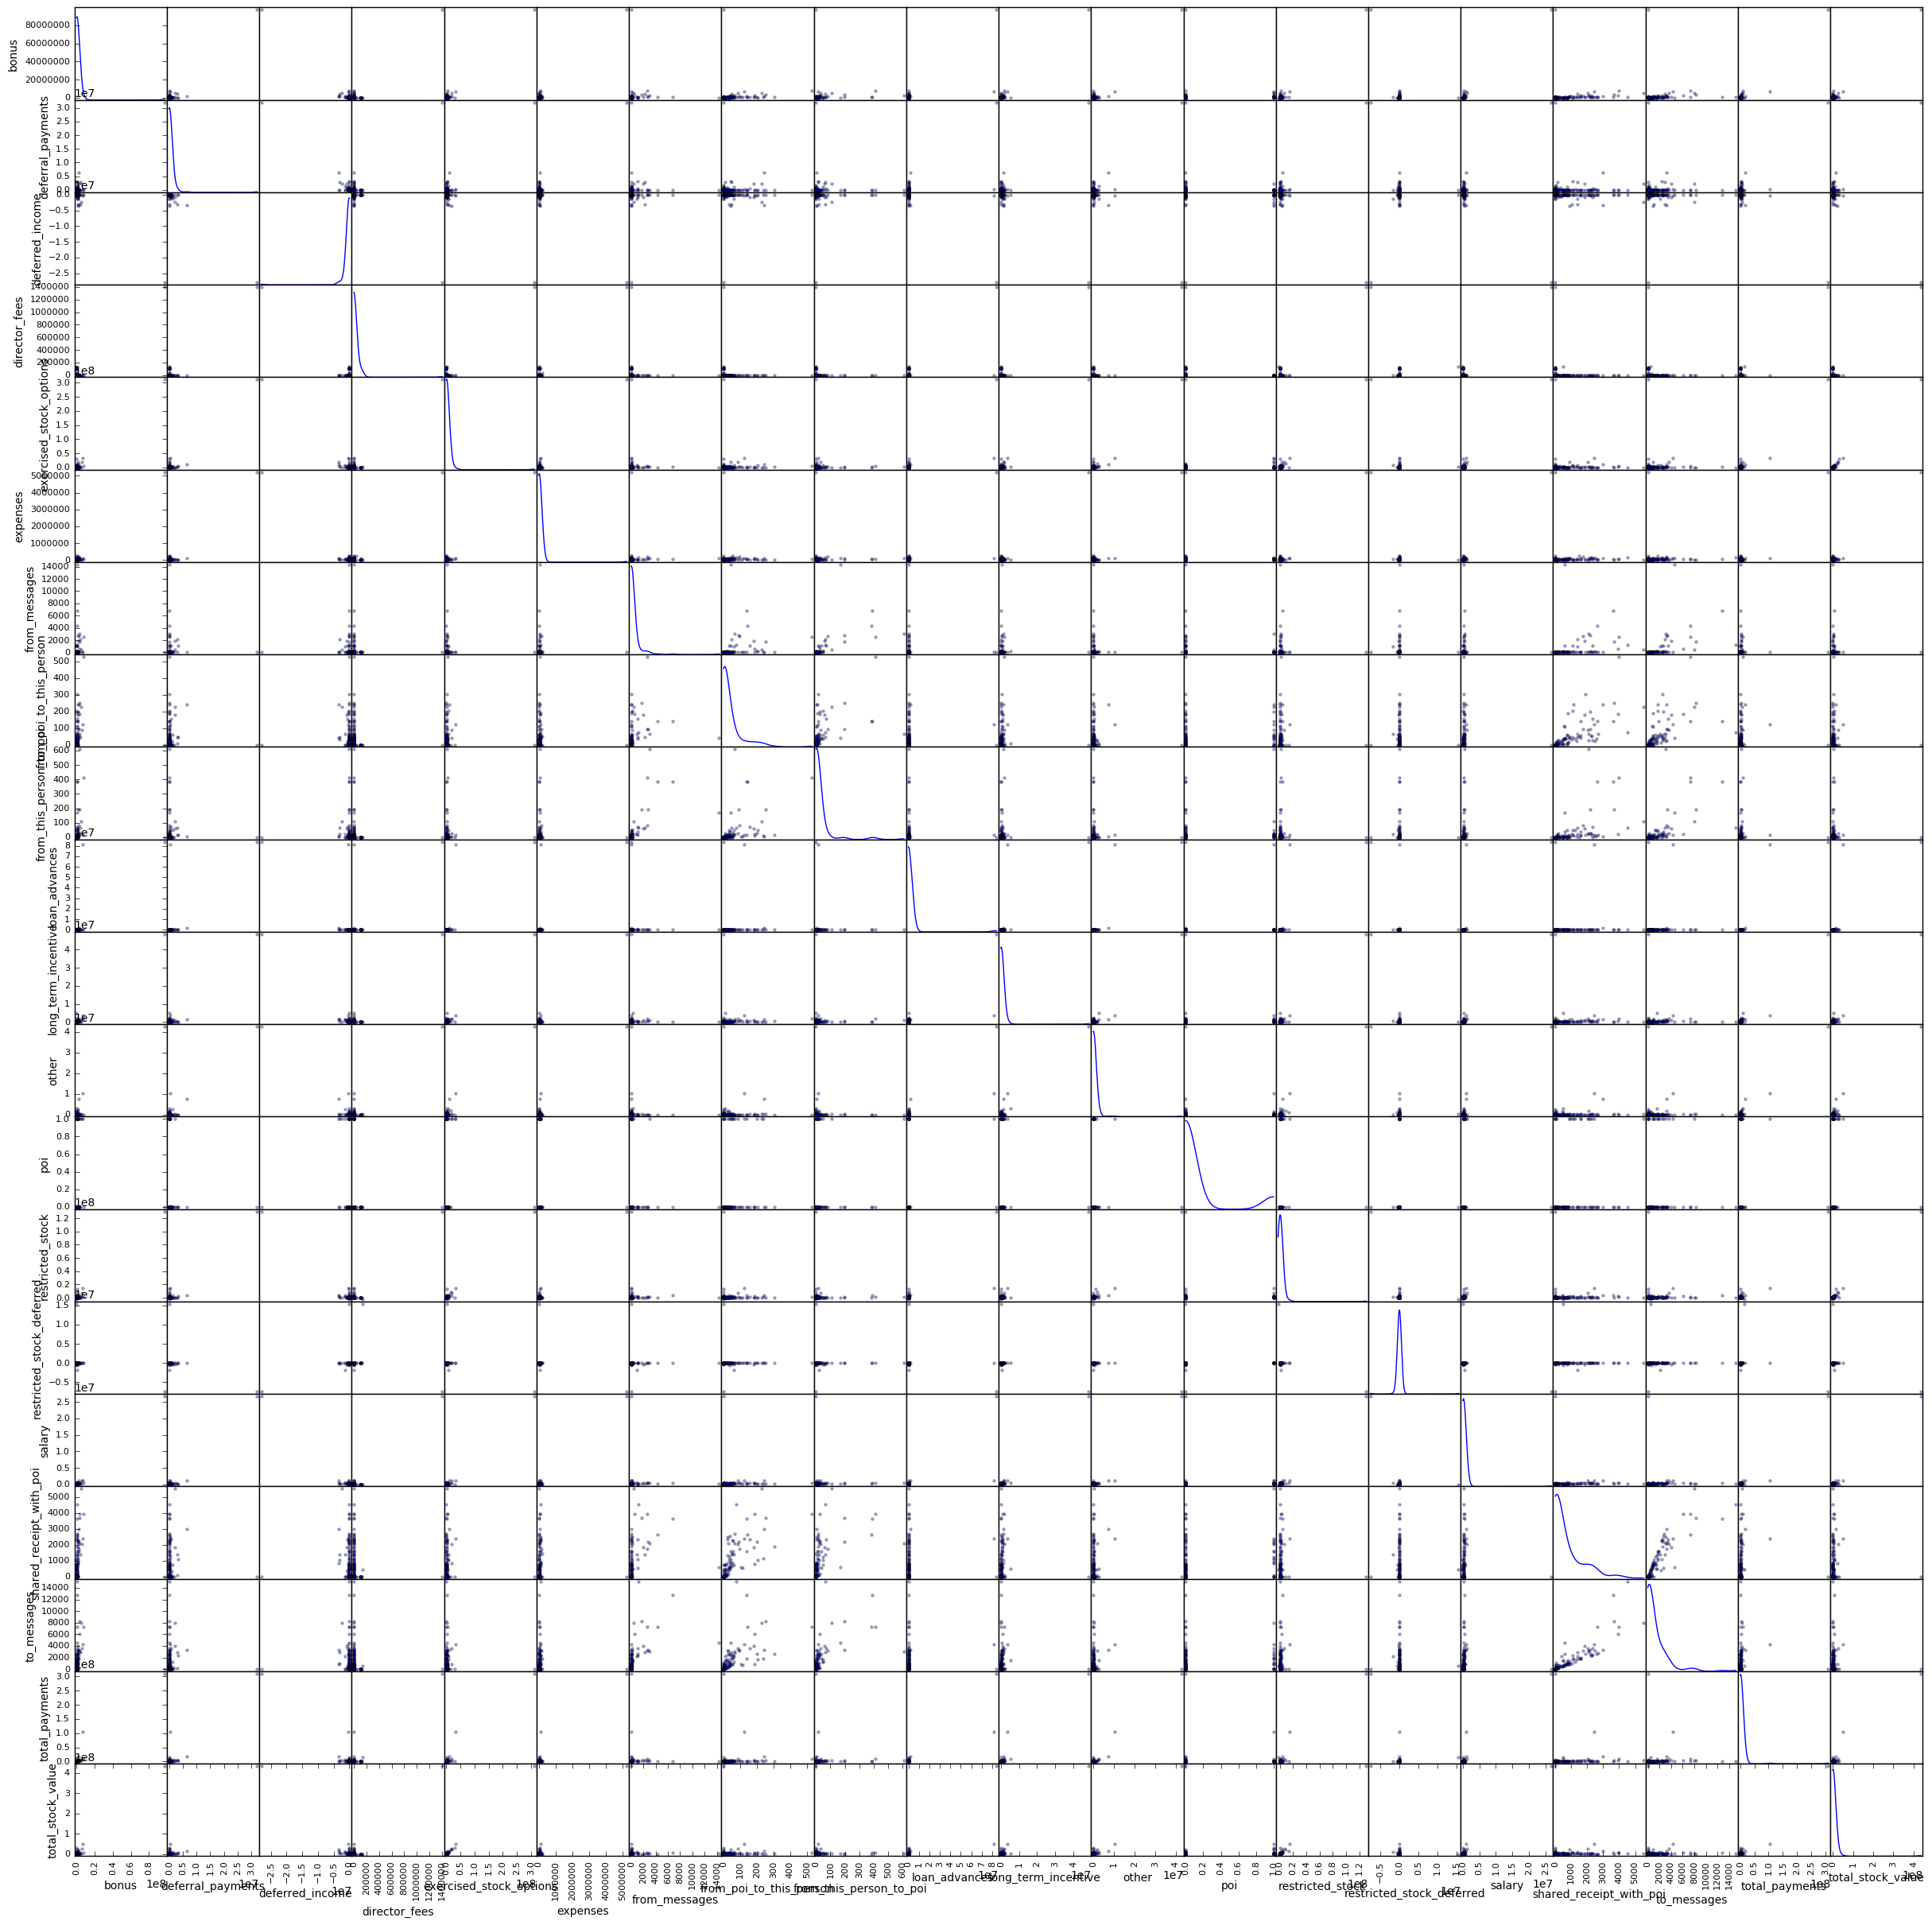

In [770]:
# Evaluate features in a scatter plot... It looks like they should be log scaled.
pd.scatter_matrix(df, alpha = 0.3, figsize = (30,30), diagonal = 'kde')

## 2) Remove Outliers

In [834]:
df_outliers_removed = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [835]:
# Print the outliers to be removed
idx = df.index.difference(df_outliers_removed.index)
print (idx)

Index([u'BECK SALLY W', u'BELDEN TIMOTHY N', u'BHATNAGAR SANJAY',
       u'DELAINEY DAVID W', u'DIETRICH JANET R', u'KAMINSKI WINCENTY J',
       u'KEAN STEVEN J', u'KITCHEN LOUISE', u'LAVORATO JOHN J',
       u'LAY KENNETH L', u'SHAPIRO RICHARD S', u'TOTAL',
       u'WHALLEY LAWRENCE G'],
      dtype='object')


In [836]:
print (df.loc[idx])

                            bonus  deferral_payments  deferred_income  \
BECK SALLY W         7.000000e+05       1.000000e-10     1.000000e-10   
BELDEN TIMOTHY N     5.249999e+06       2.144013e+06    -2.334434e+06   
BHATNAGAR SANJAY     1.000000e-10       1.000000e-10     1.000000e-10   
DELAINEY DAVID W     3.000000e+06       1.000000e-10     1.000000e-10   
DIETRICH JANET R     6.000000e+05       1.000000e-10     1.000000e-10   
KAMINSKI WINCENTY J  4.000000e+05       1.000000e-10     1.000000e-10   
KEAN STEVEN J        1.000000e+06       1.000000e-10     1.000000e-10   
KITCHEN LOUISE       3.100000e+06       1.000000e-10     1.000000e-10   
LAVORATO JOHN J      8.000000e+06       1.000000e-10     1.000000e-10   
LAY KENNETH L        7.000000e+06       2.029110e+05    -3.000000e+05   
SHAPIRO RICHARD S    6.500000e+05       1.000000e-10     1.000000e-10   
TOTAL                9.734362e+07       3.208340e+07    -2.799289e+07   
WHALLEY LAWRENCE G   3.000000e+06       1.000000e-1

In [837]:
# Seperate the POI data to use for classifiers
poi_df = df_outliers_removed['poi'].astype(int)
poi_df = pd.DataFrame(poi_df)
poi_df.head()


,poi
ALLEN PHILLIP K,0
BADUM JAMES P,0
BANNANTINE JAMES M,0
BAXTER JOHN C,0
BAY FRANKLIN R,0


In [838]:
df_outliers_removed = df_outliers_removed.drop('poi', axis = 1)

In [839]:
df_outliers_removed.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-10,1.729541e+06,13868.0,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-10,3.048050e+05,1.520000e+02,1.260270e+05,-1.260270e+05,2.019550e+05,1.407000e+03,2.902000e+03,4484442.0,1729541.0
BADUM JAMES P,1.000000e-10,1.789800e+05,1.000000e-10,1.000000e-10,2.578170e+05,3486.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,182466.0,257817.0
BANNANTINE JAMES M,1.000000e-10,1.000000e-10,-5.104000e+03,1.000000e-10,4.046157e+06,56301.0,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-10,1.000000e-10,8.645230e+05,1.757552e+06,-5.602220e+05,4.770000e+02,4.650000e+02,5.660000e+02,916197.0,5243487.0
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-10,6.680544e+06,11200.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.586055e+06,2.660303e+06,3.942714e+06,1.000000e-10,2.671020e+05,1.000000e-10,1.000000e-10,5634343.0,10623258.0
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,1.000000e-10,1.000000e-10,129142.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.900000e+01,1.457960e+05,-8.278200e+04,2.396710e+05,1.000000e-10,1.000000e-10,827696.0,63014.0


In [840]:
# Explore which features have the highest correlation with POI (target)
df_outliers_removed.corrwith(poi_df['poi'])

bonus                        0.324188
deferral_payments           -0.096403
deferred_income             -0.234680
director_fees               -0.114654
exercised_stock_options      0.349897
expenses                     0.194864
from_messages               -0.071141
from_poi_to_this_person      0.268212
from_this_person_to_poi      0.075463
loan_advances               -0.036569
long_term_incentive          0.193474
other                        0.009392
restricted_stock             0.168722
restricted_stock_deferred    0.074500
salary                       0.301283
shared_receipt_with_poi      0.238637
to_messages                  0.170513
total_payments               0.110157
total_stock_value            0.346823
dtype: float64

In [778]:
# Another method to explore feature importance on target
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
selector = SelectKBest(score_func=f_classif, k=5).fit(df_outliers_removed, poi_df)
idxs_selected = selector.get_support(indices=True)
features_dataframe_new = df[idxs_selected]

# Get the raw p-values for each feature, and transform from p-values into scores
scores = selector.scores_

print features_dataframe_new.columns

Index([u'bonus', u'exercised_stock_options', u'from_poi_to_this_person',
       u'restricted_stock_deferred', u'total_payments'],
      dtype='object')


## 3) Condense data via PCA and create new feature set

In [841]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [842]:
selection = SelectKBest()

In [843]:
pca = PCA()

In [844]:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [845]:
pipeline = Pipeline([("features", combined_features), ("rfc", rfc)])

In [846]:
param_grid = dict(features__pca__n_components=range(1,11),
                  features__univ_select__k=range(1,6))

In [847]:
# Perform grid search to determine optimal components and features
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(df_outliers_removed, poi_df['poi'])


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] features__pca__n_components=1, features__univ_select__k=1 .......
[CV]  features__pca__n_components=1, features__univ_select__k=1, score=0.822222, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1 .......
[CV]  features__pca__n_components=1, features__univ_select__k=1, score=0.818182, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, score=0.886364, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2 .......
[CV]  features__pca__n_components=1, features__univ_select__k=2, score=0.866667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2 .......
[CV]  features__pca__n_components=1, features__univ_select__k=2, score=0.840909, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2 .......
[CV]  features__pca__n_components=1, features__univ_select__k=2, score=0.886364, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=3 .......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=3, score=0.866667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=3 .......
[CV]  features__pca__n_components=1, features__univ_select__k=3, score=0.795455, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=3 .......
[CV]  features__pca__n_components=1, features__univ_select__k=3, score=0.863636, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=4 .......
[CV]  features__pca__n_components=1, features__univ_select__k=4, score=0.844444, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=4 .......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=4, score=0.886364, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=4 .......
[CV]  features__pca__n_components=1, features__univ_select__k=4, score=0.886364, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=5 .......
[CV]  features__pca__n_components=1, features__univ_select__k=5, score=0.866667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=5 .......
[CV]  features__pca__n_components=1, features__univ_select__k=5, score=0.840909, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=5 .......
[CV]  features__pca__n_components=1, features__univ_select__k=5, score=0.909091, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1 .......
[CV]  features__pca__n_components=2, features__univ_select__k=1, score=0.888889, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1 .......
[CV]

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    9.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=10, score_func=<function f_classif at 0x000000000BAE9D68>))],
       tra...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'features__pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'features__univ_select__k': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [848]:
print(grid_search.best_estimator_)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=4, score_func=<function f_classif at 0x000000000BAE9D68>))],
       transfo...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])


In [849]:
selection_new = SelectKBest(k=1)
pca_new = PCA(n_components=1)

In [850]:
combined_features_new= FeatureUnion([("pca", pca_new), ("univ_select", selection_new)])

In [851]:
# fit dataframe based on results from gridsearch
df_pca = combined_features_new.fit(df_outliers_removed, poi_df).transform(df_outliers_removed)

In [852]:
df_pca = pd.DataFrame(df_pca)

In [860]:
df_pca.index = df_outliers_removed.index

In [861]:
df_pca.head()

,0,1
ALLEN PHILLIP K,-1.247062e+05,1.729541e+06
BADUM JAMES P,-3.043145e+06,2.578170e+05
BANNANTINE JAMES M,3.464420e+06,4.046157e+06
BAXTER JOHN C,1.031222e+07,6.680544e+06
BAY FRANKLIN R,-3.221323e+06,1.000000e-10


In [792]:
#vs.biplot(df_outliers_removed, df_data)

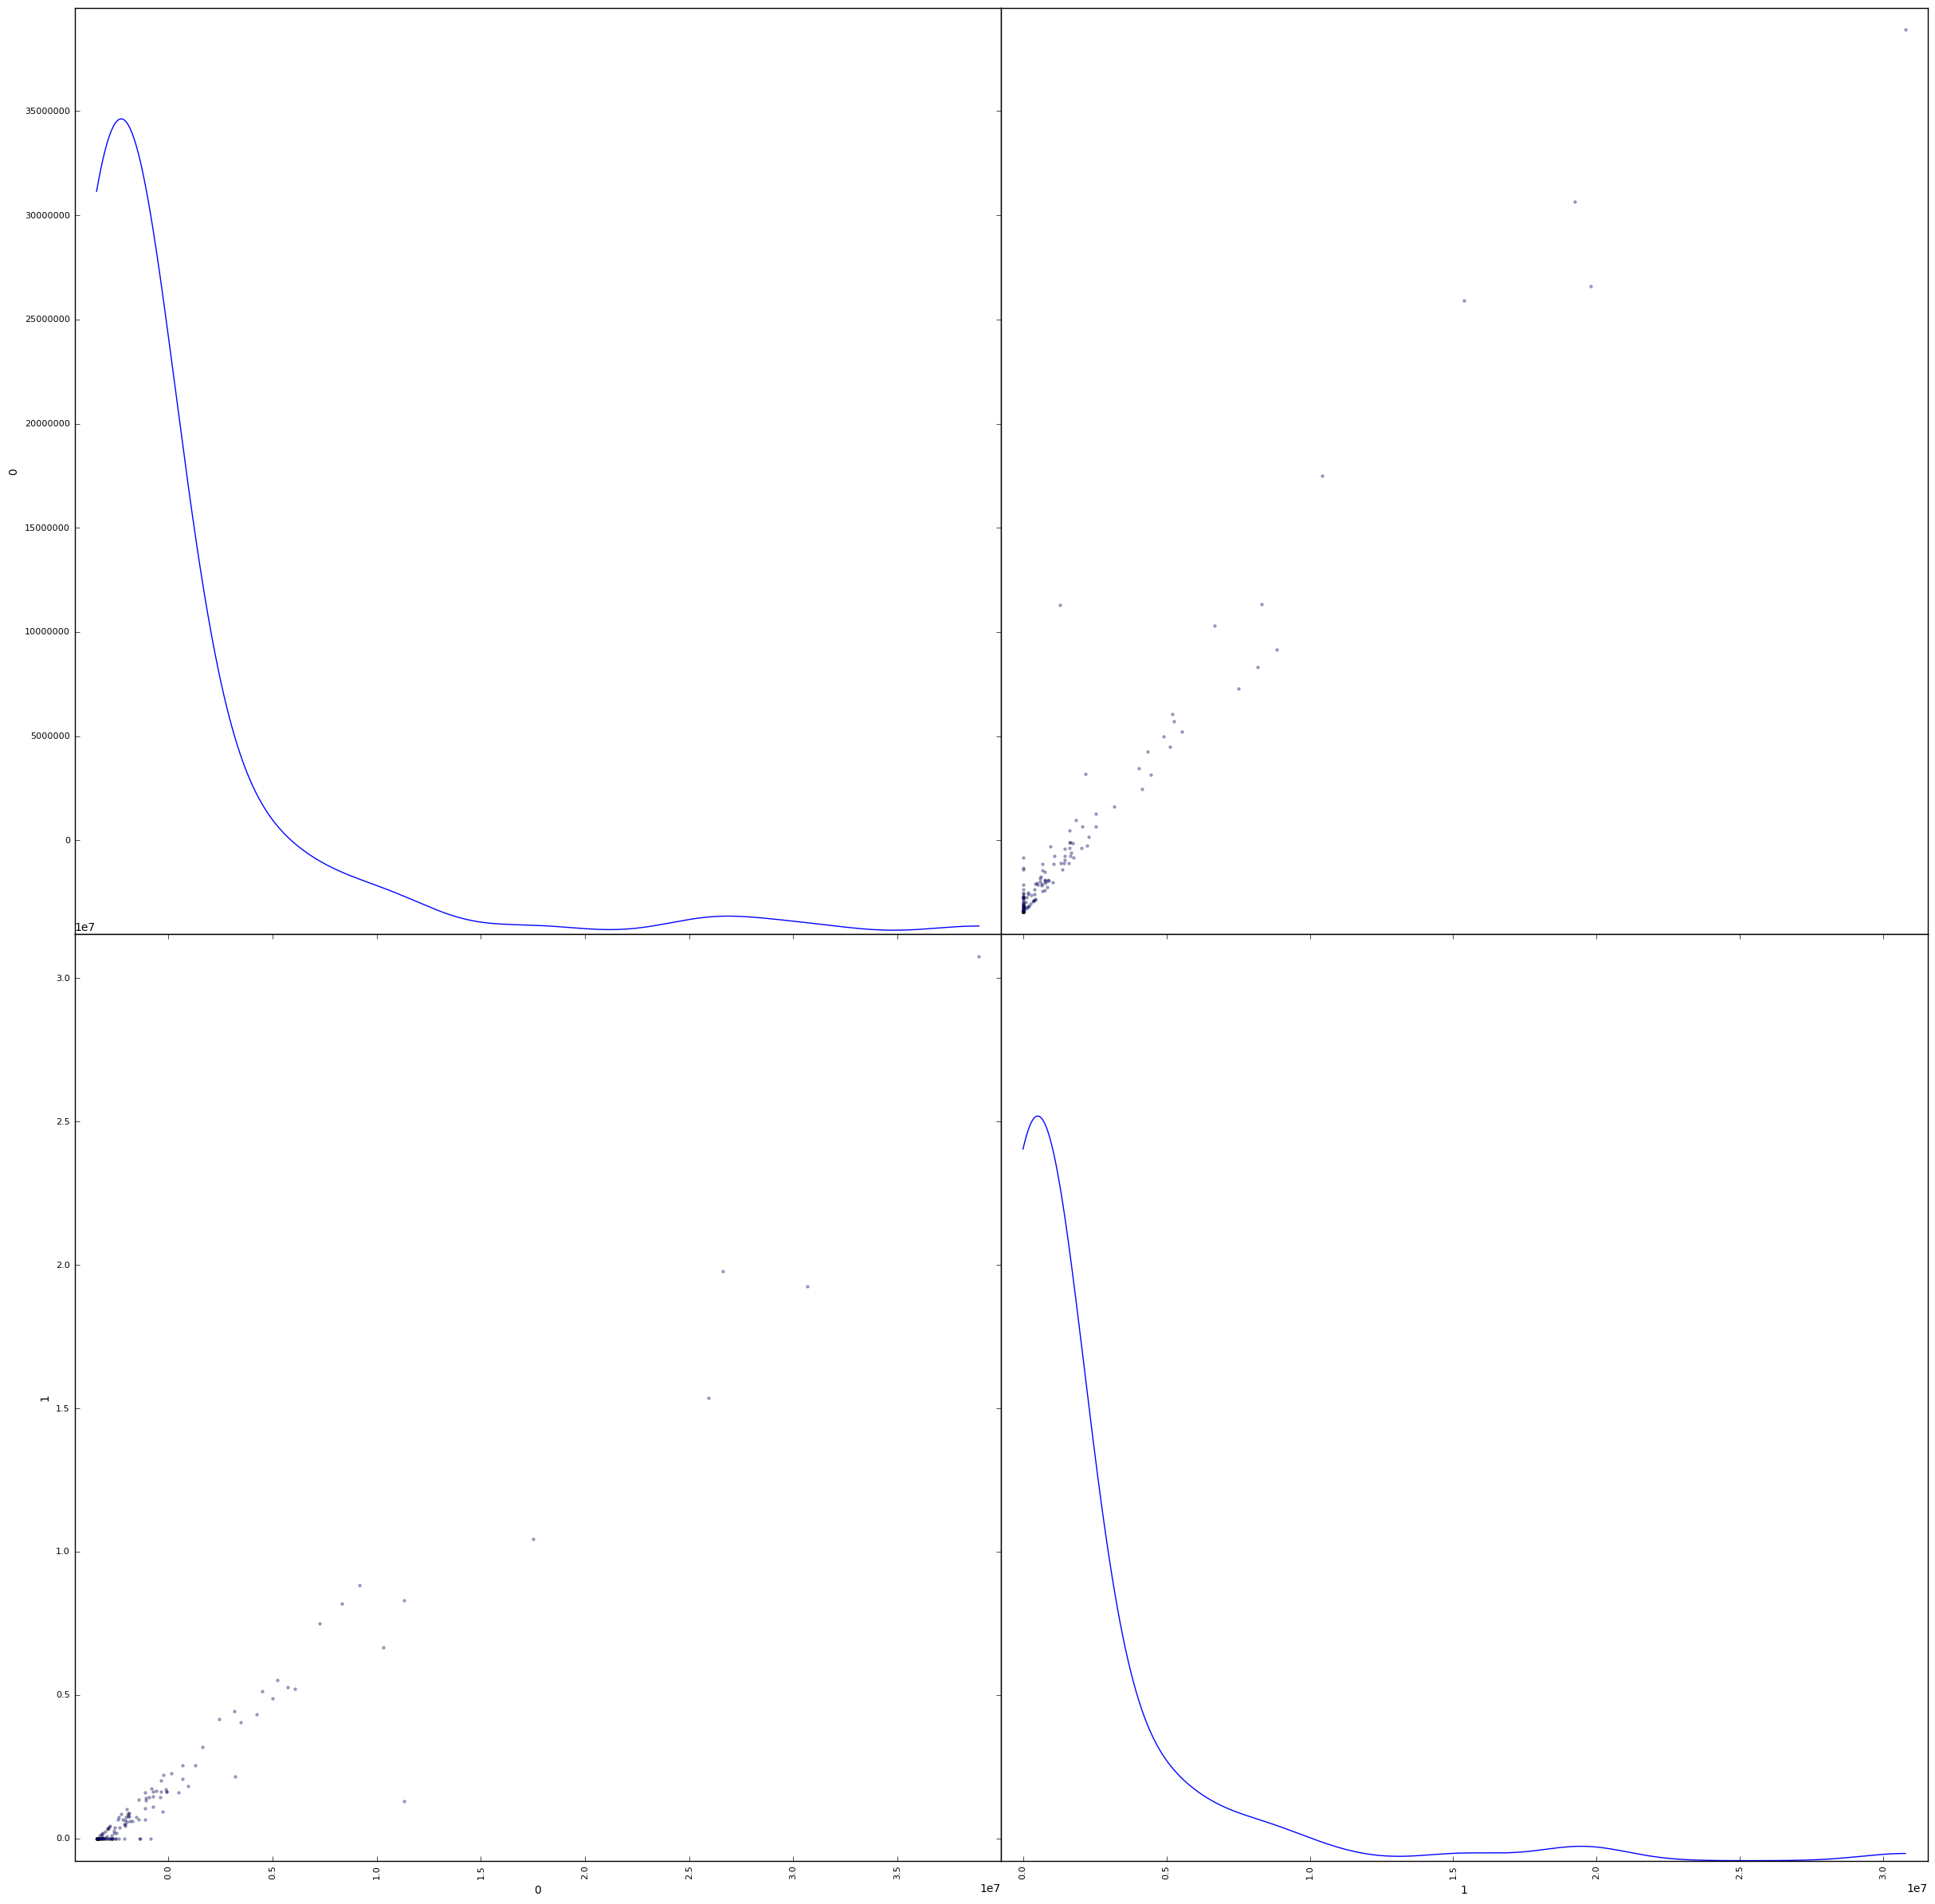

In [862]:
# Explore features in scatterplot
pd.scatter_matrix(df_pca, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

## Scale the data using the natural logarithm

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


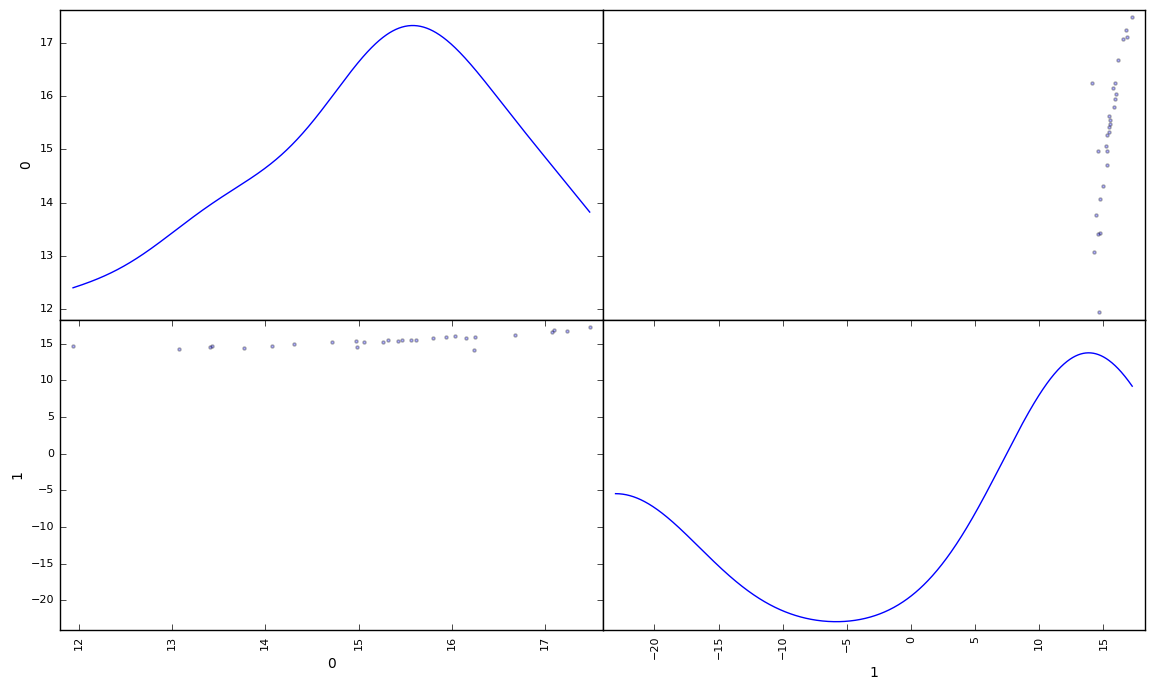

In [863]:

import math
df_log_scaled =  np.log(df_pca)
pd.scatter_matrix(df_log_scaled, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [864]:
# Replace NaN with zero so classifers can run
df_log_scaled_2 = df_log_scaled.replace('NaN',0)

In [866]:
poi_df.head()

,poi
ALLEN PHILLIP K,0
BADUM JAMES P,0
BANNANTINE JAMES M,0
BAXTER JOHN C,0
BAY FRANKLIN R,0


In [867]:
poi_array=poi_df['poi'].values

In [868]:
poi_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### 4) Try a varity of classifiers

In [869]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(df_log_scaled_2, poi_array, random_state=42)

In [870]:

from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    

    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time


    results['train_time'] = end - start

        

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    

    results['pred_time'] = end - start
            

    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        

    results['acc_test'] =  accuracy_score(y_test, predictions_test)
    

    results['precision_train'] = precision_score(y_train, predictions_train, average='weighted')  
    

    results['precision_test'] = precision_score(y_test, predictions_test, average='weighted')  
 

    results['recall_train'] = recall_score(y_train, predictions_train, average='weighted')  
    

    results['recall_test'] = recall_score(y_test, predictions_test, average='weighted')  

  
    results['f_train'] = fbeta_score(y_train, predictions_train, average='weighted', beta=0.5)

    results['f_test'] = fbeta_score(y_test, predictions_test, average='weighted', beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    print "{} training time was {} .".format(learner.__class__.__name__, results['train_time'])
    
    # Return the results
    return results

In [882]:
from sklearn.ensemble import RandomForestClassifier
train_predict(RandomForestClassifier(n_estimators=2),int(len(X_train) * 1), X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 99 samples.
RandomForestClassifier training time was 0.0149998664856 .


{'acc_test': 0.8529411764705882,
 'acc_train': 0.90909090909090906,
 'f_test': 0.78976034858387811,
 'f_train': 0.88014153029632891,
 'precision_test': 0.77540106951871657,
 'precision_train': 0.91752577319587625,
 'pred_time': 0.003999948501586914,
 'recall_test': 0.8529411764705882,
 'recall_train': 0.90909090909090906,
 'train_time': 0.014999866485595703}

In [883]:
from sklearn.svm import SVC
train_predict(SVC(kernel='rbf', random_state = 50),int(len(X_train) * 1), X_train, y_train, X_test, y_test)

SVC trained on 99 samples.
SVC training time was 0.0019998550415 .


{'acc_test': 0.88235294117647056,
 'acc_train': 0.90909090909090906,
 'f_test': 0.79730687455705174,
 'f_train': 0.88793922127255454,
 'precision_test': 0.7785467128027681,
 'precision_train': 0.89736842105263148,
 'pred_time': 0.003000020980834961,
 'recall_test': 0.88235294117647056,
 'recall_train': 0.90909090909090906,
 'train_time': 0.0019998550415039062}

In [884]:
from sklearn.naive_bayes import GaussianNB
train_predict(GaussianNB(),int(len(X_train) * 1), X_train, y_train, X_test, y_test)

GaussianNB trained on 99 samples.
GaussianNB training time was 0.00200009346008 .


{'acc_test': 0.88235294117647056,
 'acc_train': 0.90909090909090906,
 'f_test': 0.79730687455705174,
 'f_train': 0.88014153029632891,
 'precision_test': 0.7785467128027681,
 'precision_train': 0.91752577319587625,
 'pred_time': 0.0009999275207519531,
 'recall_test': 0.88235294117647056,
 'recall_train': 0.90909090909090906,
 'train_time': 0.002000093460083008}

## 5) Tune your classifier to achieve better than .3 precision and recall 

In [811]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=0)
parameters = {'min_samples_leaf': range(1, 10), 'n_estimators': range(10, 20), 
              "criterion": ["gini", "entropy"]}
              
scorer = make_scorer(accuracy_score)

grid_obj =  GridSearchCV(estimator = clf, param_grid=parameters, scoring=scorer, verbose = 10)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_




Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] n_estimators=10, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=10, criterion=gini, min_samples_leaf=1, score=0.852941, total=   0.0s
[CV] n_estimators=10, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=10, criterion=gini, min_samples_leaf=1, score=0.848485, total=   0.0s
[CV] n_estimators=10, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=10, criterion=gini, min_samples_leaf=1, score=0.906250, total=   0.0s
[CV] n_estimators=11, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=11, criterion=gini, min_samples_leaf=1, score=0.852941, total=   0.0s
[CV] n_estimators=11, criterion=gini, min_samples_leaf=1 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=11, criterion=gini, min_samples_leaf=1, score=0.787879, total=   0.0s
[CV] n_estimators=11, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=11, criterion=gini, min_samples_leaf=1, score=0.906250, total=   0.0s
[CV] n_estimators=12, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=12, criterion=gini, min_samples_leaf=1, score=0.852941, total=   0.0s
[CV] n_estimators=12, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=12, criterion=gini, min_samples_leaf=1, score=0.787879, total=   0.0s
[CV] n_estimators=12, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=12, criterion=gini, min_samples_leaf=1, score=0.906250, total=   0.0s
[CV] n_estimators=13, criterion=gini, min_samples_leaf=1 .............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=13, criterion=gini, min_samples_leaf=1, score=0.852941, total=   0.0s
[CV] n_estimators=13, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=13, criterion=gini, min_samples_leaf=1, score=0.818182, total=   0.0s
[CV] n_estimators=13, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=13, criterion=gini, min_samples_leaf=1, score=0.937500, total=   0.0s
[CV] n_estimators=14, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=14, criterion=gini, min_samples_leaf=1, score=0.852941, total=   0.0s
[CV] n_estimators=14, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=14, criterion=gini, min_samples_leaf=1, score=0.818182, total=   0.0s
[CV] n_estimators=14, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=14, criterion=gini, min_samples_leaf=1, score=0.937500, total=   0.0s
[CV] n_estimators=15, criterion=gini, min_samples_leaf=1 .............
[CV]  n_estimators=15, criterion=gini, m

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   33.7s finished


In [805]:
print best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [806]:
train_predict(best_clf,int(len(X_train) * 1), X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 99 samples.
RandomForestClassifier training time was 0.0460000038147 .


{'acc_test': 0.88235294117647056,
 'acc_train': 0.91919191919191923,
 'f_test': 0.79730687455705174,
 'f_train': 0.90108900352083832,
 'precision_test': 0.7785467128027681,
 'precision_train': 0.92592592592592582,
 'pred_time': 0.023000001907348633,
 'recall_test': 0.88235294117647056,
 'recall_train': 0.91919191919191923,
 'train_time': 0.046000003814697266}

This classifier yieled comparable accuracy and recall to the unoptimized classifer.  However, the optimized classifer yielded 1 pt higher in precision on the training set.

## 6) Dump your classifier, dataset, and features_list

In [885]:
#rename new features
df_log_scaled_2.columns = ['feature_a', 'feature_b']

In [886]:
df_log_scaled_2.head()

,feature_a,feature_b
ALLEN PHILLIP K,0.000000,14.363367
BADUM JAMES P,0.000000,12.460005
BANNANTINE JAMES M,15.058056,15.213278
BAXTER JOHN C,16.148840,15.714710
BAY FRANKLIN R,0.000000,-23.025851


In [887]:
features_list = ['poi','feature_a', 'feature_b'] 

In [888]:
final_df =  pd.concat([df_log_scaled_2, poi_df])

In [891]:
final_df = final_df.replace('NaN',0)

In [894]:
dump_classifier_and_data(best_clf, final_df, features_list)

In [895]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


error: key  poi  not present


TypeError: 'NoneType' object is not iterable